In [62]:
import pandas as pd
from textblob import TextBlob
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Authentication
consumerKey = "Hmsn90xXN6yAb7HYXR9n9B2eK"
consumerSecret ="BvruOuoaY0AtuZY1zYzUDeOWBJWRYb747Mw7SAbLFAW9Wzjw29"
accessToken = "1387640944195903492-cugKyWbrLuuweJ4MX1nhcS6Jh5ptgU"
accessTokenSecret = "Odes3GXyy4FtR24QJv8yizEV2lReeVbxGbnRMv8anJkl9"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(auth)

#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0

tweet_list = []
tweet_list.clear()
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
#print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
    
elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
 
elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')


In [63]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  0
negative number:  0
neutral number:  1


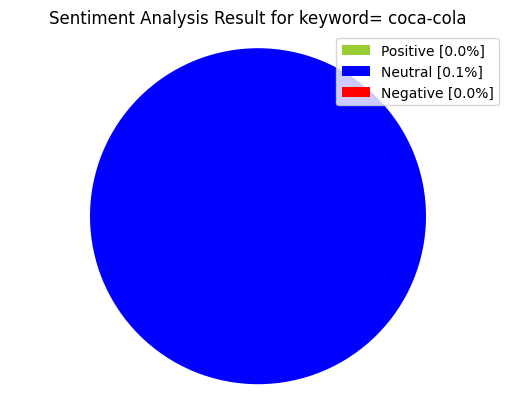

In [64]:
#Creating PieCart
from matplotlib import pyplot as plt


labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [65]:
tweet_list

,0
0,coca cola é literalmente meu vício
1,"tomar uma coca cola com você \n-"" é ainda melh..."
2,RT @rookie0nline: pobre cristiano sonriendo cu...
3,@gabrianpa @tutiofifa @HDWolvie @Darbyyyyy_ @L...
4,RT @MyTXTLatam_: 🎥 » #투모로우바이투게더 @TXT_members @...
...,...
995,RT @Sergioguerra08: Hey @cheluralbo10 dice tu ...
996,a escassez de coca cola no cidade das flores e...
997,"RT @Cotoparra751: @MissVitt In the pencil, on ..."
998,@cuthepinto coca cola


In [66]:
tw_list = pd.DataFrame(tweet_list)

In [68]:
print(tw_list)

                                                     0
0                   coca cola é literalmente meu vício
1    tomar uma coca cola com você \n-" é ainda melh...
2    RT @rookie0nline: pobre cristiano sonriendo cu...
3    @gabrianpa @tutiofifa @HDWolvie @Darbyyyyy_ @L...
4    RT @MyTXTLatam_: 🎥 » #투모로우바이투게더 @TXT_members @...
..                                                 ...
995  RT @Sergioguerra08: Hey @cheluralbo10 dice tu ...
996  a escassez de coca cola no cidade das flores e...
997  RT @Cotoparra751: @MissVitt In the pencil, on ...
998                              @cuthepinto coca cola
999                @cuthepinto “coca cola😶‍🌫️😶‍🌫️😶‍🌫️”

[1000 rows x 1 columns]


In [70]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
import re
tw_list["text"] = tw_list[0]
tw_list


,0,text
0,coca cola é literalmente meu vício,coca cola é literalmente meu vício
1,"tomar uma coca cola com você \n-"" é ainda melh...","tomar uma coca cola com você \n-"" é ainda melh..."
2,RT @rookie0nline: pobre cristiano sonriendo cu...,RT @rookie0nline: pobre cristiano sonriendo cu...
3,@gabrianpa @tutiofifa @HDWolvie @Darbyyyyy_ @L...,@gabrianpa @tutiofifa @HDWolvie @Darbyyyyy_ @L...
4,RT @MyTXTLatam_: 🎥 » #투모로우바이투게더 @TXT_members @...,RT @MyTXTLatam_: 🎥 » #투모로우바이투게더 @TXT_members @...
...,...,...
995,RT @Sergioguerra08: Hey @cheluralbo10 dice tu ...,RT @Sergioguerra08: Hey @cheluralbo10 dice tu ...
996,a escassez de coca cola no cidade das flores e...,a escassez de coca cola no cidade das flores e...
997,"RT @Cotoparra751: @MissVitt In the pencil, on ...","RT @Cotoparra751: @MissVitt In the pencil, on ..."
998,@cuthepinto coca cola,@cuthepinto coca cola


In [72]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

C:\Users\Sethu\AppData\Local\Temp\ipykernel_16128\3806910711.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,coca cola é literalmente meu vício,coca cola é literalmente meu vício,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
1,"tomar uma coca cola com você \n-"" é ainda melh...","tomar uma coca cola com você \n-"" é ainda melh...",0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
2,RT @rookie0nline: pobre cristiano sonriendo cu...,RT @rookie0nline: pobre cristiano sonriendo cu...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
3,@gabrianpa @tutiofifa @HDWolvie @Darbyyyyy_ @L...,@gabrianpa @tutiofifa @HDWolvie @Darbyyyyy_ @L...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
4,RT @MyTXTLatam_: 🎥 » #투모로우바이투게더 @TXT_members @...,RT @MyTXTLatam_: 🎥 » #투모로우바이투게더 @TXT_members @...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
5,RT @TrungTPhan: The story of Coca-Cola and coc...,RT @TrungTPhan: The story of Coca-Cola and coc...,0.700000,0.850000,positive,NaN,NaN,NaN,NaN
6,@euskico Coca cola Racing powered by Erebus Ma...,@euskico Coca cola Racing powered by Erebus Ma...,0.450000,0.600000,positive,NaN,NaN,NaN,NaN
7,Pero a ese ron le falta coca cola,Pero a ese ron le falta coca cola,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
8,"Fanbook, coca cola bottles, then BOOM MR BIG H...","Fanbook, coca cola bottles, then BOOM MR BIG H...",0.000000,0.100000,positive,NaN,NaN,NaN,NaN
9,@CassyNotCasey Maybe we can get Coca-cola to e...,@CassyNotCasey Maybe we can get Coca-cola to e...,-0.333333,0.666667,negative,NaN,NaN,NaN,NaN


In [74]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [75]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,644,64.4
positive,180,18.0
negative,176,17.6


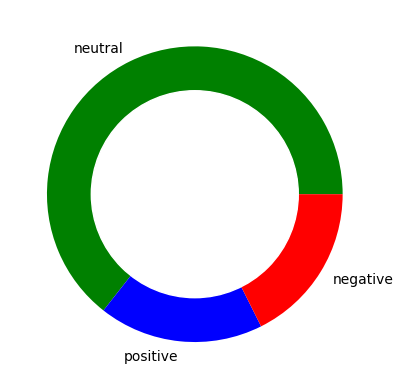

In [76]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [87]:
#Function to Create Wordcloud
import numpy as np
from wordcloud import STOPWORDS, WordCloud
from PIL import Image
# from keras.preprocessing import image

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


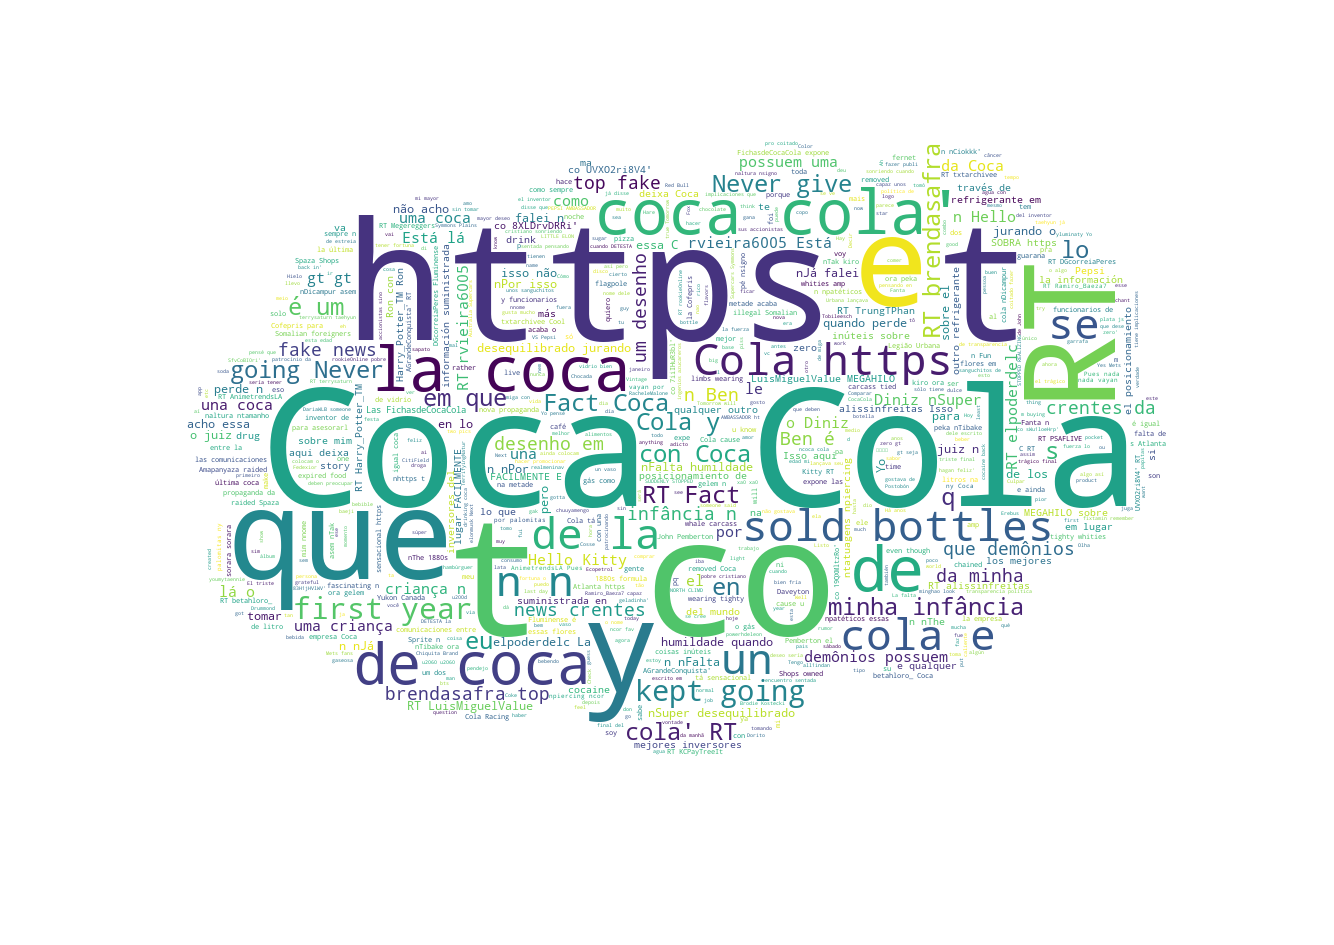

In [90]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


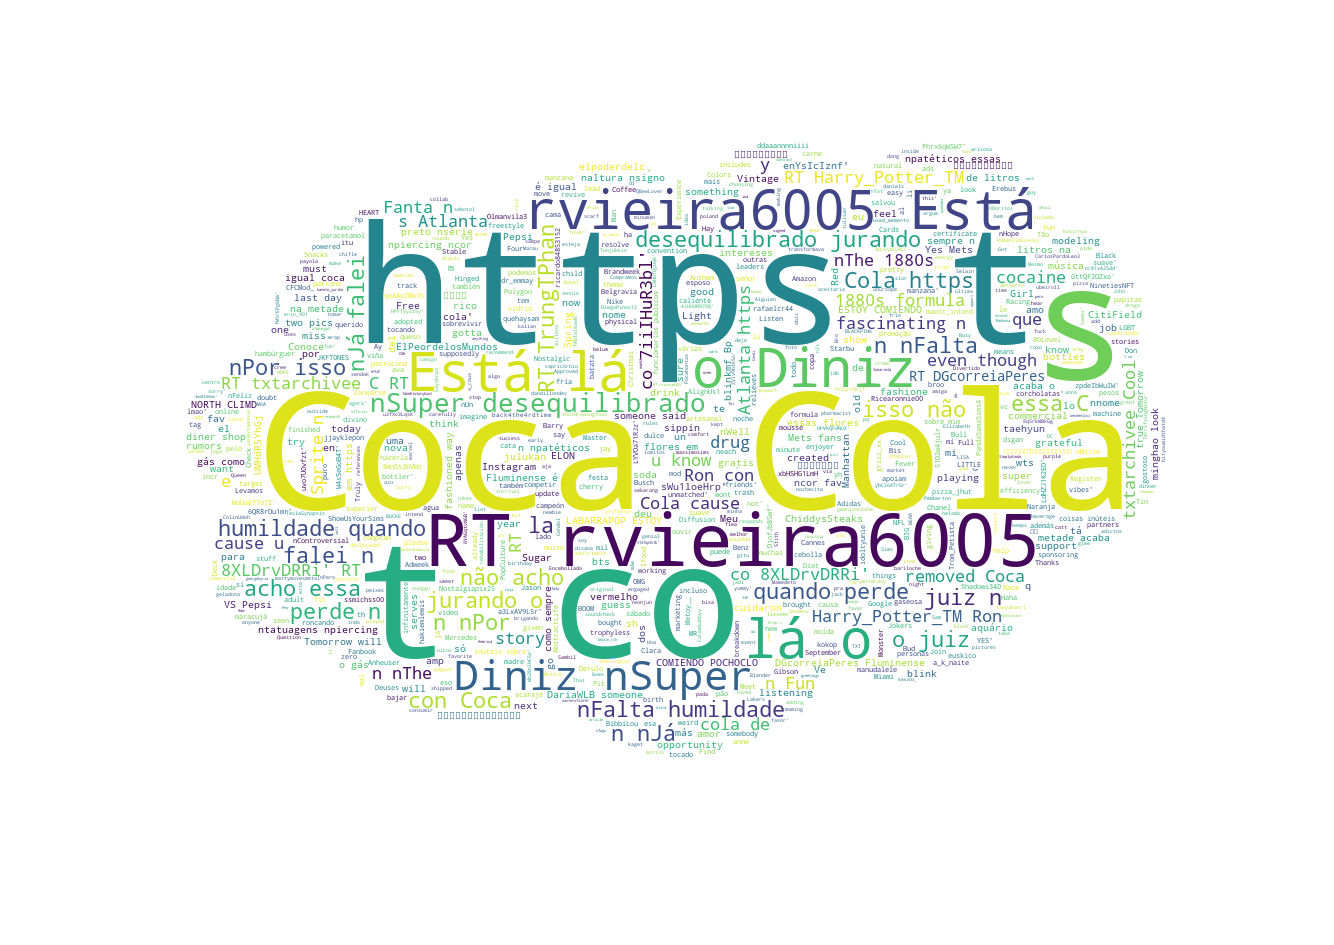

In [91]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


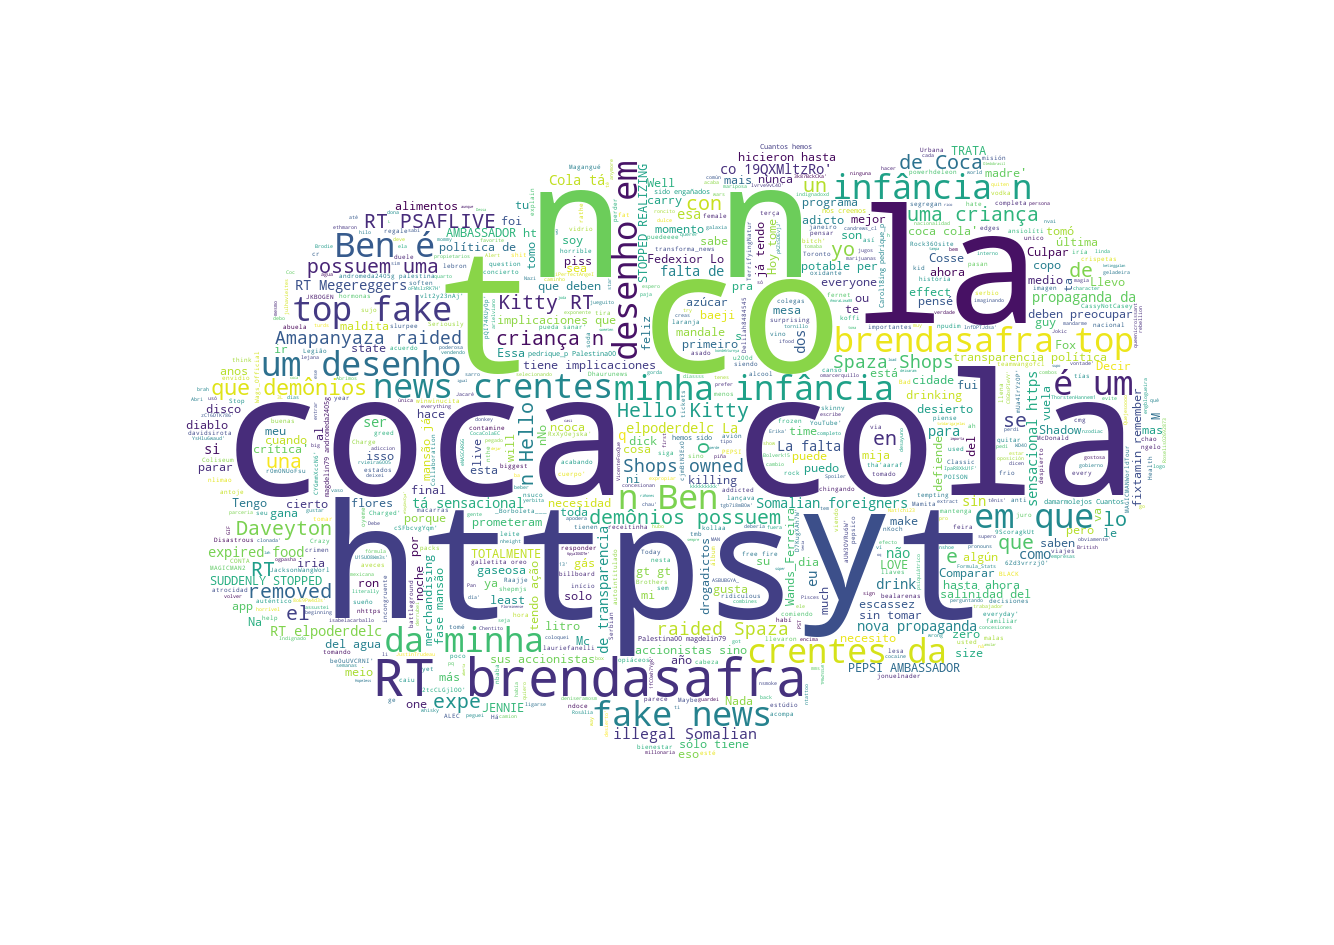

In [92]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

In [94]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,112.45
neutral,92.02
positive,106.23


In [95]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,19.05
neutral,14.45
positive,16.74


In [98]:
#Removing Punctuation
import string
import nltk

def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,coca cola é literalmente meu vício,coca cola é literalmente meu vício,0.0,0.0,neutral,0.0,1.0,0.0,0.0,34,6,coca cola é literalmente meu vício,"[coca, cola, é, literalmente, meu, vício]","[coca, cola, é, literalmente, meu, vício]","[coca, cola, é, literalment, meu, vício]"
1,"tomar uma coca cola com você \n-"" é ainda melh...","tomar uma coca cola com você \n-"" é ainda melh...",0.0,0.0,neutral,0.0,1.0,0.0,0.0,140,21,tomar uma coca cola com você \n é ainda melhor...,"[tomar, uma, coca, cola, com, você, é, ainda, ...","[tomar, uma, coca, cola, com, você, é, ainda, ...","[tomar, uma, coca, cola, com, você, é, ainda, ..."
2,RT @rookie0nline: pobre cristiano sonriendo cu...,RT @rookie0nline: pobre cristiano sonriendo cu...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,140,26,RT rookienline pobre cristiano sonriendo cuand...,"[rt, rookienline, pobre, cristiano, sonriendo,...","[rt, rookienline, pobre, cristiano, sonriendo,...","[rt, rookienlin, pobr, cristiano, sonriendo, c..."
3,@gabrianpa @tutiofifa @HDWolvie @Darbyyyyy_ @L...,@gabrianpa @tutiofifa @HDWolvie @Darbyyyyy_ @L...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,140,18,gabrianpa tutiofifa HDWolvie Darbyyyyy LuixenS...,"[gabrianpa, tutiofifa, hdwolvie, darbyyyyy, lu...","[gabrianpa, tutiofifa, hdwolvie, darbyyyyy, lu...","[gabrianpa, tutiofifa, hdwolvi, darbyyyyi, lui..."
4,RT @MyTXTLatam_: 🎥 » #투모로우바이투게더 @TXT_members @...,RT @MyTXTLatam_: 🎥 » #투모로우바이투게더 @TXT_members @...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,140,19,RT MyTXTLatam 🎥 » 투모로우바이투게더 TXTmembers TXTbigh...,"[rt, mytxtlatam, 투모로우바이투게더, txtmembers, txtbig...","[rt, mytxtlatam, 투모로우바이투게더, txtmembers, txtbig...","[rt, mytxtlatam, 투모로우바이투게더, txtmember, txtbigh..."


In [99]:
# Now, you can apply coun vectorizer 
# the see all 2966 unique words as a new features.
from sklearn.feature_extraction.text import CountVectorizer
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())


1000 Number of reviews has 3666 words


In [101]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names_out())
count_vect_df.head()

,,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaja,aapl,abajo,aberta,abi,abr,abri,abrimo,...,時に寝てもうて時過ぎに起きてしまって,本当,杨洋,귀공자,김선호,뉴진스,맛있다,코카콜라,태현,투모로우바이투게더
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
cola,506
rt,414
de,336
,329
cocacola,287
la,266
que,221
lo,107
e,93
con,87


In [103]:
# Building n gram model helps us to predict most probably word that might 
# follow this sequence. Firstly let’s create a function then 
# built n2_bigram, n3_trigram etc.
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('coca cola', 788),
 ('la coca', 75),
 ('cola https', 58),
 ('cola sold', 39),
 ('sold 25', 39),
 ('25 bottles', 39),
 ('bottles year', 39),
 ('year kept', 39),
 ('kept going', 39),
 ('rt fact', 38),
 ('fact coca', 38),
 ('minha infância', 30),
 ('em que', 30),
 ('rt brendasafra', 29),
 ('brendasafra 10', 29),
 ('10 fake', 29),
 ('fake news', 29),
 ('news crentes', 29),
 ('crentes da', 29),
 ('da minha', 29)]

In [104]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('la coca cola', 74),
 ('coca cola https', 58),
 ('coca cola sold', 39),
 ('cola sold 25', 39),
 ('sold 25 bottles', 39),
 ('25 bottles year', 39),
 ('bottles year kept', 39),
 ('year kept going', 39),
 ('rt fact coca', 38),
 ('fact coca cola', 38),
 ('rt brendasafra 10', 29),
 ('brendasafra 10 fake', 29),
 ('10 fake news', 29),
 ('fake news crentes', 29),
 ('news crentes da', 29),
 ('crentes da minha', 29),
 ('da minha infância', 29),
 ('minha infância ben', 29),
 ('infância ben 10', 29),
 ('ben 10 um', 29)]

Finally, you can analyze sentiment using tweets and you can realize which words most used and which words used together.